In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import numpy as np
import matplotlib.image as img

In [2]:
diamonds= pd.read_csv(r'../data/diamonds_clean.csv')

In [3]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_index,color_index
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,5
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,5
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,5
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0


In [4]:
# DATASET PREPARATION

# Cut is an ordinal feature, define order to sort data
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
diamonds.cut = pd.Categorical(diamonds.cut, categories = cut_categories)

/var/folders/lc/q1lfsr356d11n9j92x9l_x080000gn/T/ipykernel_70550/2687058551.py:84: RuntimeWarning: Second argument 'x' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax7.plot('carat', 'x', data = diamonds.sort_values(by = 'carat'))
/var/folders/lc/q1lfsr356d11n9j92x9l_x080000gn/T/ipykernel_70550/2687058551.py:93: RuntimeWarning: Second argument 'x' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax8.plot('carat', 'x', data = diamonds.sort_values(by = 'carat'))
/var/folders/lc/q1lfsr356d11n9j92x9l_x080000gn

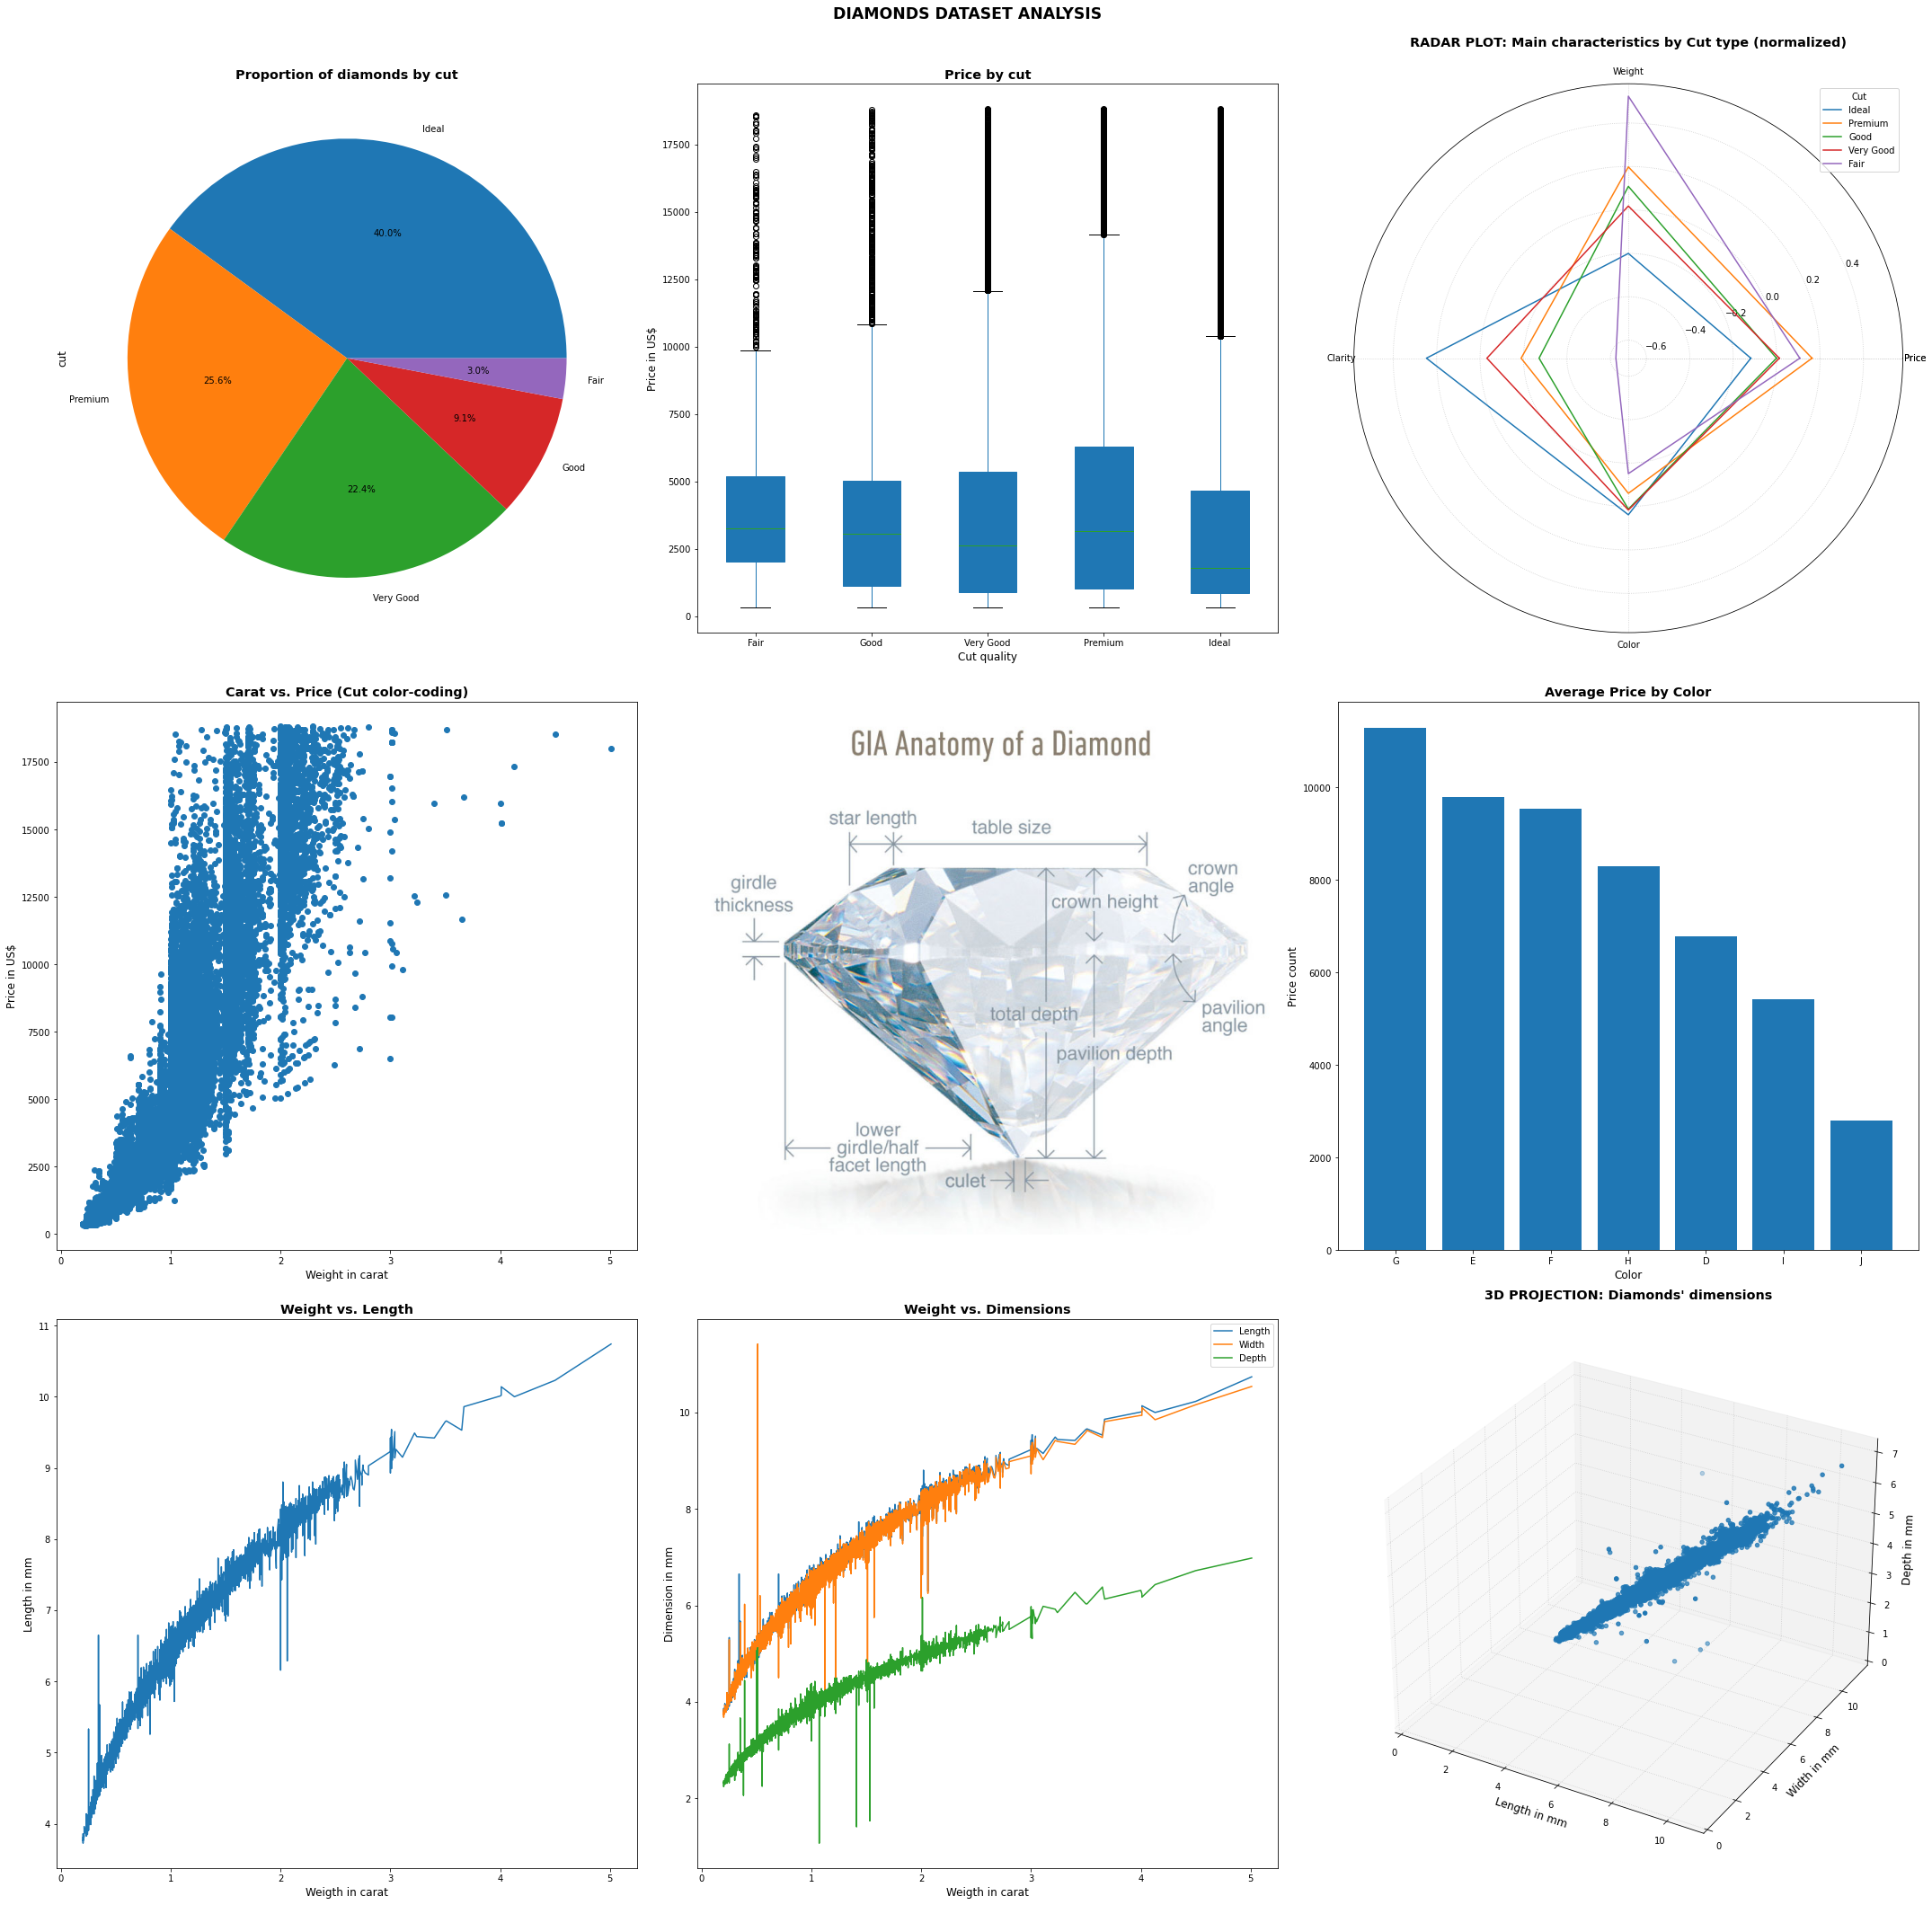

In [6]:
# FIGURE PREPARATION
plt.style.use('../style_sheets/style_sheet.mplstyle')
fig = plt.figure(figsize=(30,30))


# 1. PIE CHART - DOES NOT EXIST IN SEABORN: USE MATPLOTLIB ONLY
ax1 = fig.add_subplot(331)

diamonds['cut'].value_counts().plot(kind='pie', autopct='%.1f%%', ax = ax1)
ax1.set_title('Proportion of diamonds by cut')


# 2. BOXPLOT
ax2 = fig.add_subplot(332)

diamonds.boxplot(by ='cut', column =['price'], grid = False, patch_artist=True, ax = ax2)
ax2.set_xlabel('Cut quality')
ax2.set_ylabel('Price in US$')
ax2.set_title('Price by cut')


# 3. RADAR
ax3 = fig.add_subplot(333, polar = True)

# Normalization of data [-1; 1]
normalized_diamonds = pd.DataFrame()
for col in diamonds.columns:
    # Normalize numeric columns only
    if is_numeric_dtype(diamonds[col]):
        normalized_diamonds[col]=(diamonds[col]-diamonds[col].mean())/diamonds[col].std()
    # Other columncs remain the same
    else:
        normalized_diamonds[col]=diamonds[col]


categories = ['Price', 'Weight', 'Clarity', 'Color']
categories = [*categories, categories[0]]
# Split the circle in 4 angles of same size
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))

d = {}
for cut in diamonds.cut.unique():
    d[cut] = normalized_diamonds.loc[normalized_diamonds.cut == cut, ['price', 'carat', 'clarity_index', 'color_index', 'price']].mean().to_list()
    ax3.plot(label_loc, d[cut], label = cut)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
ax3.set_title('RADAR PLOT: Main characteristics by Cut type (normalized)\n')
ax3.legend(title = 'Cut')


# 4. SCATTER PLOT
ax4 = fig.add_subplot(334)

carat = diamonds.carat
price = diamonds.price
ax4.scatter(carat, price)
ax4.set_xlabel('Weight in carat')
ax4.set_ylabel('Price in US$')
ax4.set_title('Carat vs. Price (Cut color-coding)')


# 5. IMAGE
ax5 = fig.add_subplot(335)
image = img.imread('../style_sheets/diamond.jpeg')
ax5.imshow(image)
plt.axis('off')


# 6. BAR PLOT
ax6 = fig.add_subplot(336)

colorindexes = diamonds["color"].value_counts().index.tolist()
colorcount = diamonds["color"].value_counts().values.tolist()

ax6.bar(colorindexes, colorcount)
ax6.set_xlabel('Color')
ax6.set_ylabel('Price count')
ax6.set_title('Average Price by Color')


# 7. LINEAR PLOT
ax7 = fig.add_subplot(337)

ax7.plot('carat', 'x', data = diamonds.sort_values(by = 'carat'))
ax7.set_xlabel('Weigth in carat')
ax7.set_ylabel('Length in mm')
ax7.set_title('Weight vs. Length')


# 8. MULTIPLE SERIES
ax8 = fig.add_subplot(338)

ax8.plot('carat', 'x', data = diamonds.sort_values(by = 'carat'))
ax8.plot('carat', 'y', data = diamonds.sort_values(by = 'carat'))
ax8.plot('carat', 'z', data = diamonds.sort_values(by = 'carat'))
ax8.set_xlabel('Weigth in carat')
ax8.set_ylabel('Dimension in mm')
ax8.set_title('Weight vs. Dimensions')
ax8.legend(labels = ['Length', 'Width', 'Depth'])


# 9. 3D PROJECTION
ax9 = fig.add_subplot(339, projection = '3d')

ax9 = fig.add_subplot(339, projection = '3d')
ax9.scatter(diamonds.x, diamonds.y, diamonds.z, cmap = plt.get_cmap('viridis'))

ax9.set_title('3D PROJECTION: Diamonds\' dimensions\n')
ax9.set_xlim(left = 0)
ax9.set_xlabel('Length in mm')
ax9.set_ylim(bottom = 0)
ax9.set_ylabel('Width in mm')
ax9.set_zlabel('Depth in mm')
ax9.set_zlim(bottom = 0)


# DISPLAY
fig.suptitle('DIAMONDS DATASET ANALYSIS')
fig.tight_layout()
fig.subplots_adjust(top=0.94)
plt.show()